
# Project: Exploring the Evolution of Movies: A Data Analysis of TMDB

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Over the years, the film industry has undergone significant transformations, driven by advancements in technology, shifts in audience preferences, and evolving economic landscapes. This analysis aims to explore key aspects of movies' evolution by focusing on two crucial dimensions: profitability and average budgets through the years. By answering pertinent questions related to the most and least profitable genre by year and the average budget compared to runtime by year, we will gain valuable insights into how these factors have shaped the movie landscape.

In [1]:
#importing in the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

I will start off by loading the dataset and explore it to better understand the data I will be working with. 

### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#determine the number of rows and columns
df.shape

(10866, 21)

In [4]:
#find the name of all of the columns, and if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In the above cells, I was able to verify that the data loaded correctly, and there are 10866 rows with 21 columns. Some of these columns are unnecessary, so I will start off by removing the extra columns first.

### Data Cleaning 



In [5]:
df.drop(['id', 'imdb_id', 'popularity', 'director', 'budget', 'revenue', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average' ], axis=1, inplace=True)

I removed most of the columns that I will not be using, including 'budge' and revenue'. I will utilize 'budget_adj' and 'revenue_adj' which calculates the adjusted budget and revenue for inflation. This will put all of the movies on an even playing field.


In [6]:
#verify we have all the correct columns in the correct data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  10866 non-null  object 
 1   runtime         10866 non-null  int64  
 2   genres          10843 non-null  object 
 3   release_date    10866 non-null  object 
 4   release_year    10866 non-null  int64  
 5   budget_adj      10866 non-null  float64
 6   revenue_adj     10866 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 594.4+ KB


Here we can see there are few null values for 'genres'. There are not that many null values in these columns so I will drop them.

In [7]:
#drop the null values
df.dropna(inplace=True)

In [8]:
#verify that nulls have been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  10843 non-null  object 
 1   runtime         10843 non-null  int64  
 2   genres          10843 non-null  object 
 3   release_date    10843 non-null  object 
 4   release_year    10843 non-null  int64  
 5   budget_adj      10843 non-null  float64
 6   revenue_adj     10843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 677.7+ KB


In [9]:
#check if there are any duplicate records
df.duplicated().sum()

1

There is one duplicate row that will need to be dropped.

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
#verifing it was dropped
df.shape

(10842, 7)

In [12]:
#Checking if budget_adj or revenue_adj has any 0s 
df.describe()

,runtime,release_year,budget_adj,revenue_adj
count,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,102.138443,2001.314794,1.758712e+07,5.147797e+07
std,31.294612,12.813617,3.433437e+07,1.447723e+08
min,0.000000,1960.000000,0.000000e+00,0.000000e+00
25%,90.000000,1995.000000,0.000000e+00,0.000000e+00
50%,99.000000,2006.000000,0.000000e+00,0.000000e+00
75%,111.000000,2011.000000,2.092507e+07,3.387838e+07
max,900.000000,2015.000000,4.250000e+08,2.827124e+09


In [13]:
#dropping records with budget_adj or revenue_adj = 0
df = df[df['budget_adj'] != 0]
df = df[df['revenue_adj'] != 0]

In [14]:
df.describe()

,runtime,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,109.220291,2001.261028,4.423999e+07,1.370647e+08
std,19.922820,11.282575,4.480925e+07,2.161114e+08
min,15.000000,1960.000000,9.693980e-01,2.370705e+00
25%,95.000000,1995.000000,1.309053e+07,1.835735e+07
50%,106.000000,2004.000000,3.001611e+07,6.173068e+07
75%,119.000000,2010.000000,6.061307e+07,1.632577e+08
max,338.000000,2015.000000,4.250000e+08,2.827124e+09


Now we can see that every movie has a budget and revenue record.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 - What is the most and least profitable genre by year?


In [15]:
# split the string in 'genres'
df['genres'] = df['genres'].str.split('|')

In [16]:
# create a new datafram & seperate the strings in 'genres'
df_genres = df.explode('genres')

In [17]:
# Verify the new dataframe is correct
df_genres.head()

,original_title,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,Jurassic World,124,Action,6/9/15,2015,1.379999e+08,1.392446e+09
0,Jurassic World,124,Adventure,6/9/15,2015,1.379999e+08,1.392446e+09
0,Jurassic World,124,Science Fiction,6/9/15,2015,1.379999e+08,1.392446e+09
0,Jurassic World,124,Thriller,6/9/15,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,120,Action,5/13/15,2015,1.379999e+08,3.481613e+08


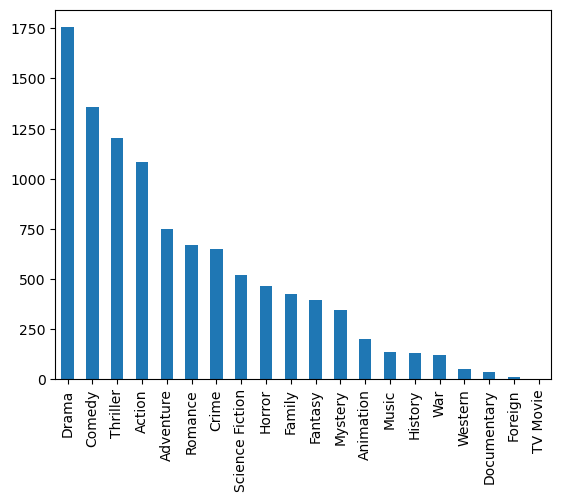

In [18]:
#exploring some of the vaules that will be used
df_genres['genres'].value_counts().plot(kind='bar');

Drama is the most common genre in our data, while TV Movie is the least. 

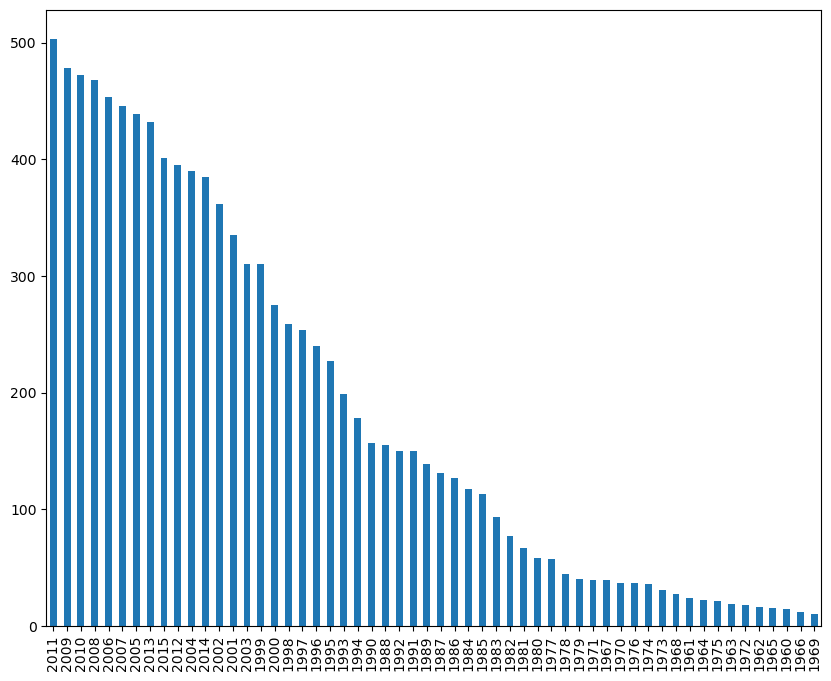

In [19]:
#explore 'release_year'
df_genres['release_year'].value_counts().plot(kind='bar', figsize=(10,8));

The trend indicates that the quantity of records tends to increase for more recent years.

In [20]:
#creating histogram function
def myhist(dataframe, column):
    title = column.replace('_',' ')
    dataframe[column].hist()
    plt.title('Distribution of {}' .format(title.title()))
    plt.xlabel(column.title())
    plt.ylabel('Frequency');
              


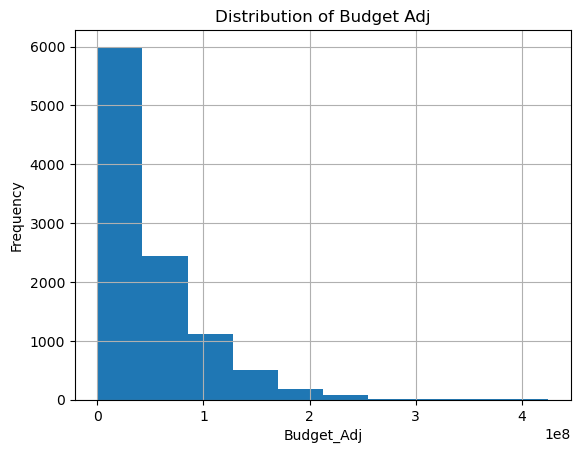

In [21]:
#explore 'budget_adj'
myhist(df_genres, 'budget_adj')

The graph shows this data skews to the right.

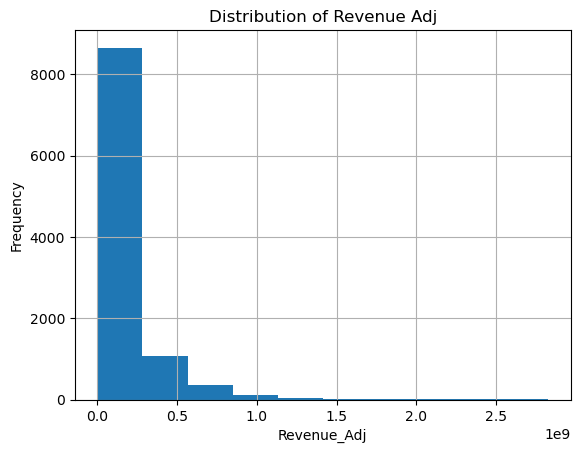

In [22]:
#explore 'revenue_adj'
myhist(df_genres, 'revenue_adj')

The graph shows this data skews to the right.

In [23]:
# Calculate profitability by subtracting budget from revenue
df_genres['profit_adj'] = df_genres['revenue_adj'] - df_genres['budget_adj']

In [24]:
# Lets look at the 'profit_adj' column 
profits = df_genres['profit_adj'].describe()
profits

count    1.030300e+04
mean     1.022092e+08
std      2.093842e+08
min     -4.139124e+08
25%     -2.145957e+06
50%      2.988219e+07
75%      1.205680e+08
max      2.750137e+09
Name: profit_adj, dtype: float64

In [25]:
# Lets make 'profit_adj' easier to read
df_genres['profit_adj'] = df_genres['profit_adj']/1000000
profits = df_genres['profit_adj'].describe()
profits

count    10303.000000
mean       102.209172
std        209.384233
min       -413.912431
25%         -2.145957
50%         29.882190
75%        120.568047
max       2750.136651
Name: profit_adj, dtype: float64

In [26]:
#Rename profit_adj to show it is in millions
df_genres.rename(columns={'profit_adj': 'adj_profit_millions'}, inplace=True)
df_genres['adj_profit_millions']

0        1254.445953
0        1254.445953
0        1254.445953
0        1254.445953
1         210.161353
            ...     
10835      53.744118
10835      53.744118
10835      53.744118
10848      46.253531
10848      46.253531
Name: adj_profit_millions, Length: 10303, dtype: float64

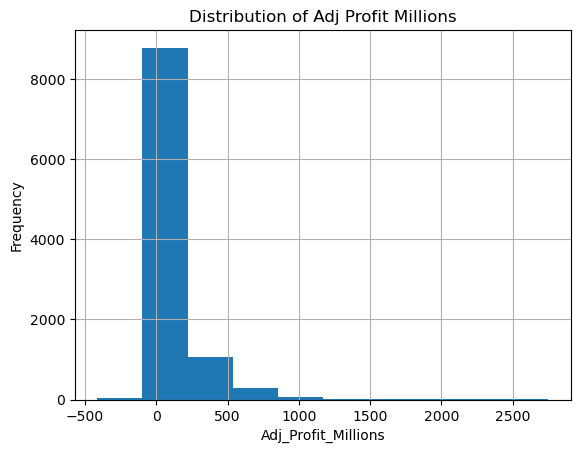

In [27]:
#explore the new 'adj_profit_millions' column
myhist(df_genres, 'adj_profit_millions')

Here we can see that some movies were not profitable and lost money.

In [28]:
# Group by release_year and genre, and sum the profit_adj
x = df_genres.groupby(['release_year', 'genres'])['adj_profit_millions'].sum()
x.head(20)

release_year  genres   
1960          Action        375.320908
              Adventure      21.418470
              Comedy        192.434451
              Drama         746.093079
              History       353.902438
              Horror        229.985357
              Romance       192.434451
              Thriller      229.985357
              Western        21.418470
1961          Action        154.651058
              Adventure    1712.687617
              Animation    1545.635295
              Comedy       1619.313393
              Crime         274.701290
              Drama         628.110704
              Family       1552.930156
              History        51.064028
              Horror         13.130750
              Music         274.701290
              Romance        51.064028
Name: adj_profit_millions, dtype: float64

In [29]:
# Find the genre with the highest profit for each year
most_profitable_genre = x.groupby(level='release_year').idxmax()

# Find the profit for that genre
most_prof_amount = x.groupby(level='release_year').max()

In [30]:
# Merge the two groups together for the high
merged_df = pd.merge(most_profitable_genre, most_prof_amount, how='inner', on='release_year')

# Reset the index to make the join column a regular column
merged_df.reset_index(drop=False, inplace=True)

# Rename the columns for readibility
merged_df.rename(columns={'adj_profit_millions_x' : 'genre', 'adj_profit_millions_y' : 'adj_profit_million'}, inplace=True)

In [31]:
# Correct the genre column
merged_df['genre'] = merged_df['genre'].str[1]

Now that I have created a new dataframe to hold the high values, I will create one to hold the low values.

In [32]:
# Find the genre with the lowest profit for each year
least_profitable_genre = x.groupby(level='release_year').idxmin()

# Find the profit for that genre
min_prof_amount = x.groupby(level='release_year').min()

In [33]:
# Merge the two groups together for the low
merged_df_low = pd.merge(least_profitable_genre, min_prof_amount, how='inner', on='release_year')

# Reset the index to make the join column a regular column
merged_df_low.reset_index(drop=False, inplace=True)

# Rename the columns for readibility
merged_df_low.rename(columns={'adj_profit_millions_x' : 'genre', 'adj_profit_millions_y' : 'adj_profit_million'}, inplace=True)

# Correct the genre column
merged_df_low['genre'] = merged_df_low['genre'].str[1]

In [34]:
#creating color dictionarys for both graphs

color_dict = {}
color_dict = {'Drama': 'purple', 'Adventure' : 'gold', 'Thriller' : 'firebrick', 'Music' : 'y', 'Romance' : 'deeppink', 
              'Mystery' : 'teal', 'Crime' : 'silver', 'Horror' : 'k', 'Science Fiction' : 'fuchsia', 'Action' : 'orangered',
              'Comedy' : 'g'}

color_dict_low = {}
color_dict_low = {'Adventure' : 'gold', 'Music' : 'y', 'Romance' : 'deeppink', 'Mystery' : 'teal', 'Crime' : 'silver',
                  'Horror' : 'k', 'Science Fiction' : 'fuchsia', 'Fantasy' : 'mediumorchid', 'Western' : 'saddlebrown',
                  'Family' : 'yellowgreen', 'Animation' : 'slateblue', 'War' : 'crimson', 'History' : 'navy', 
                  'Documentary' : 'darkgreen', 'Foreign' : 'turquoise', 'TV Movie' : 'g'}
              

In [35]:
#adding the color_dict to the high dataframe
merged_df['color'] = merged_df['genre'].map(color_dict)

#adding the color_dict_low to the low dataframe
merged_df_low['color'] = merged_df_low['genre'].map(color_dict_low)

#checking to see what it looks like
merged_df_low.head()

,release_year,genre,adj_profit_million,color
0,1960,Adventure,21.418470,gold
1,1961,Western,-12.401264,saddlebrown
2,1962,Crime,80.228926,silver
3,1963,War,7.120179,crimson
4,1964,Crime,34.201119,silver


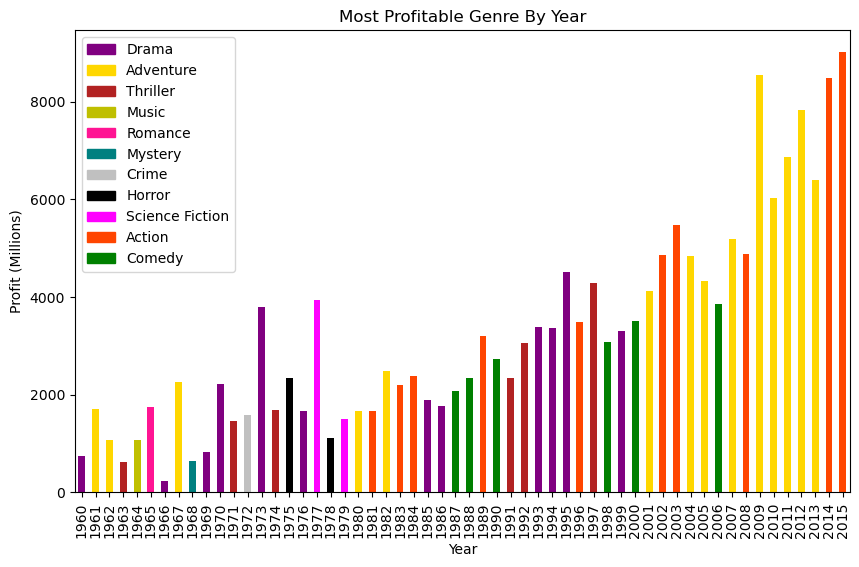

In [36]:
#create the bar graph for the high
high = merged_df.plot(x='release_year', y='adj_profit_million', kind='bar', color=merged_df['color'], legend=True, figsize=(10, 6))
plt.title("Most Profitable Genre By Year")
plt.xlabel("Year")
plt.ylabel("Profit (Millions)")

#create a legend based on the color dictionary
handles = [plt.Rectangle((0,0),1,1, color=color_dict[label]) for label in color_dict]
labels = color_dict.keys()
plt.legend(handles, labels);


This graph shows between 2001-2015 Action and Adventure movies have been consistently the most profitable genres. Prior to that, there was more variation in the most profitable genres. 

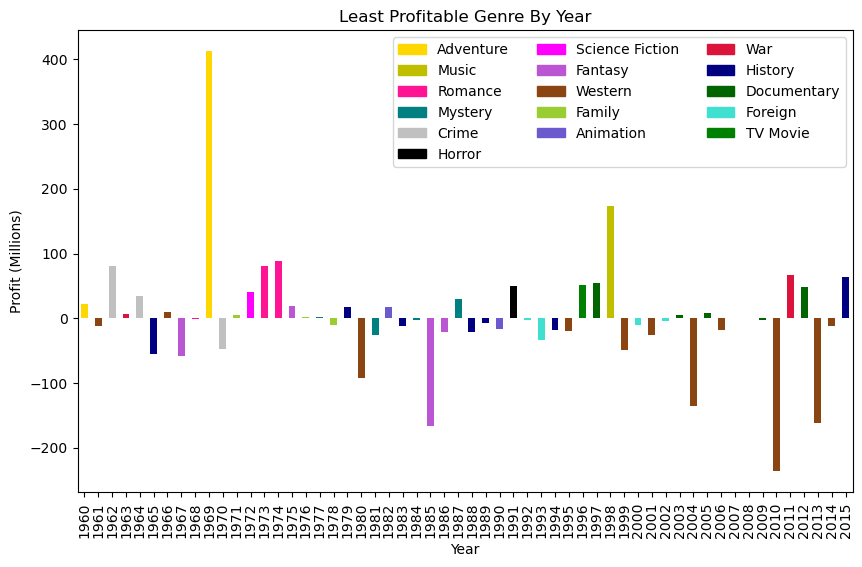

In [37]:
#create the low bar graph
low = merged_df_low.plot(x='release_year', y='adj_profit_million', kind='bar', color=merged_df_low['color'], legend=True, figsize=(10, 6))
plt.title("Least Profitable Genre By Year")
plt.xlabel("Year")
plt.ylabel("Profit (Millions)")

#create a legend based on the color dictionary
handles = [plt.Rectangle((0,0),1,1, color=color_dict_low[label]) for label in color_dict_low]
labels = color_dict_low.keys()
plt.legend(handles, labels, loc='upper right', ncol=3);

In this graph we see between 1999 – 2015, the Western genre has been the most frequent unprofitable films. Before 1999, it was more common for a genre to not be very profitable, but to still make some profit. There are also several years where the least profitable genre broke so close to 0, that it is hard to see on the graph. 


In [38]:
#create colors for line graph

color_dict_line= {}
color_dict_line = {'Adventure' : 'gold', 'Music' : 'y', 'Romance' : 'deeppink', 'Mystery' : 'bisque', 'Crime' : 'silver',
                  'Horror' : 'thistle', 'Science Fiction' : 'fuchsia', 'Fantasy' : 'purple', 'Western' : 'peru',
                  'Family' : 'yellowgreen', 'Animation' : 'slateblue', 'War' : 'crimson', 'History' : 'navy', 
                  'Documentary' : 'w', 'Foreign' : 'turquoise', 'TV Movie' : 'mistyrose',
                  'Action' : 'orangered', 'Comedy' : 'g', 'Drama': 'purple', 'Thriller' : 'k'}

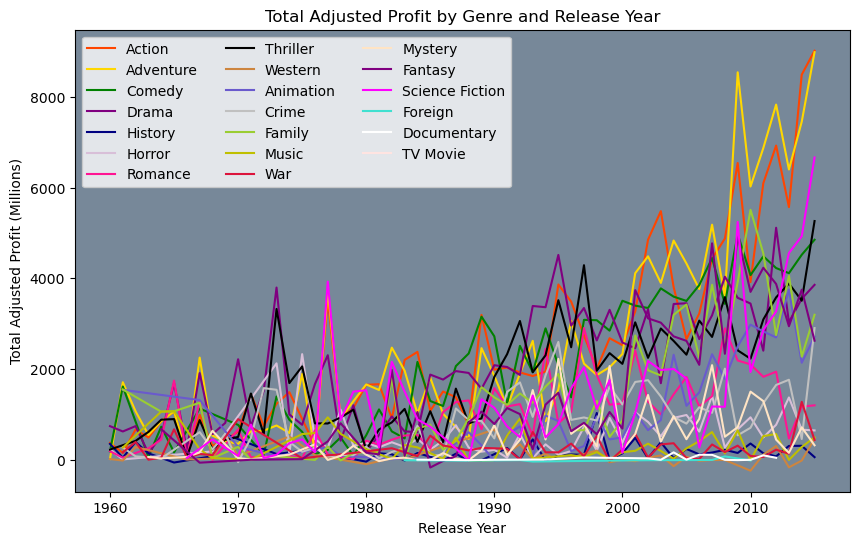

In [39]:
#creating a new dataframe so I can make changes without changing the other graphs
df_line = df_genres

#group the data by 'release_year' and 'genres' and calculate the sum of 'adj_profit_millions'
lines = df_line.groupby(['release_year', 'genres'])['adj_profit_millions'].sum().reset_index()

#create a line graph
plt.figure(figsize=(10, 6))  

for genre in lines['genres'].unique():
    genre_data = lines[lines['genres'] == genre]
    plt.plot(genre_data['release_year'], genre_data['adj_profit_millions'], label=genre, color=color_dict_line[genre])

#set background color for better visability   
ax = plt.gca()  
ax.set_facecolor('lightslategray') 

#set the labels and title
plt.xlabel('Release Year')
plt.ylabel('Total Adjusted Profit (Millions)')
plt.title('Total Adjusted Profit by Genre and Release Year')

#add a legend
plt.legend(loc='upper left', ncol=3);

The line graph shows that we do not have a record for every genre for every year. The profitability of the Romance genre can vary greatly, while other genres like Foreign and Documentary typically don’t make much no matter the year. 

### Research Question 2  - How has the average budget of films changed over the years?

In [40]:
#first explore the data that will be used
df['budget_adj'].describe()

count    3.854000e+03
mean     4.423999e+07
std      4.480925e+07
min      9.693980e-01
25%      1.309053e+07
50%      3.001611e+07
75%      6.061307e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

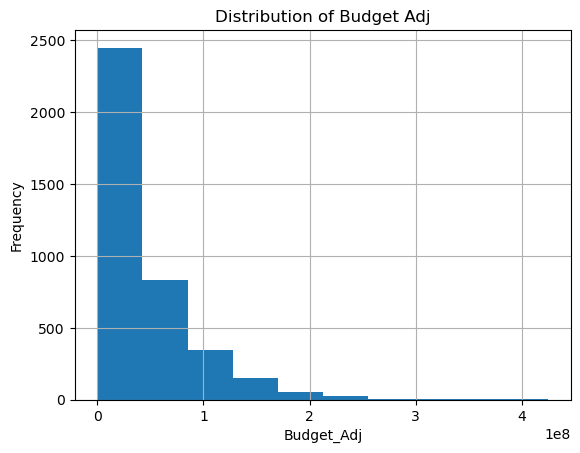

In [41]:
#explore 'budge_adj'
myhist(df, 'budget_adj')

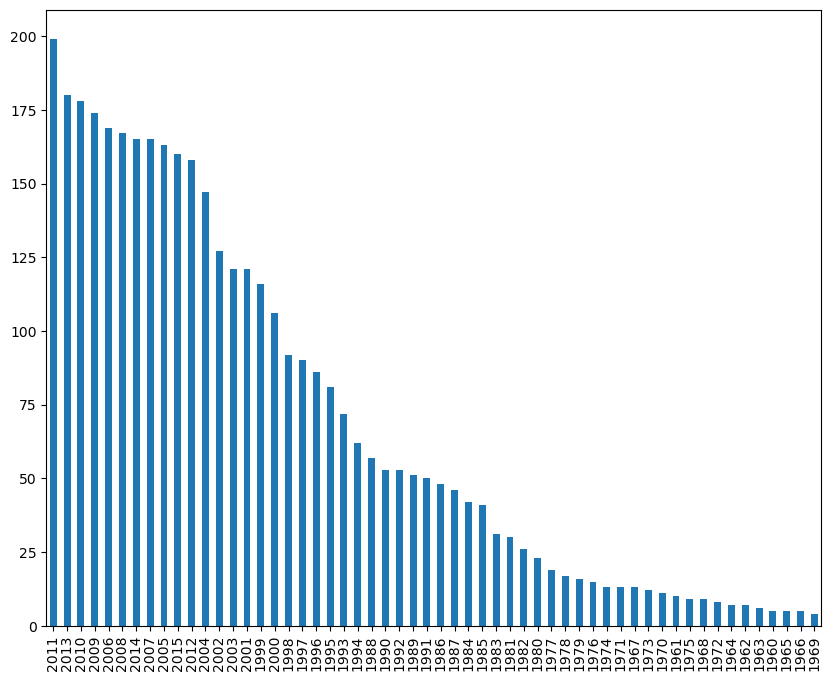

In [42]:
#explore 'release_year'
df['release_year'].value_counts().plot(kind='bar', figsize=(10,8));

Since we did not 'explode' the 'genres' column in this data frame, the numbers are different, but still show generally the same thing.

In [43]:
#converting 'budget_adj' to millions
df['budget_adj'] = df['budget_adj']/1000000

#group the data by 'release_year' and calculate the average budget for each year
avg_budget_yr = df.groupby('release_year')['budget_adj'].mean()

#renaming 'budget_adj' column
df.rename(columns={'budget_adj' : 'budget_adj_millions'}, inplace=True)

#checking to see what it looks like
avg_budget_yr.head()

release_year
1960    30.681790
1961    28.185155
1962    40.624758
1963    72.524960
1964    34.081894
Name: budget_adj, dtype: float64

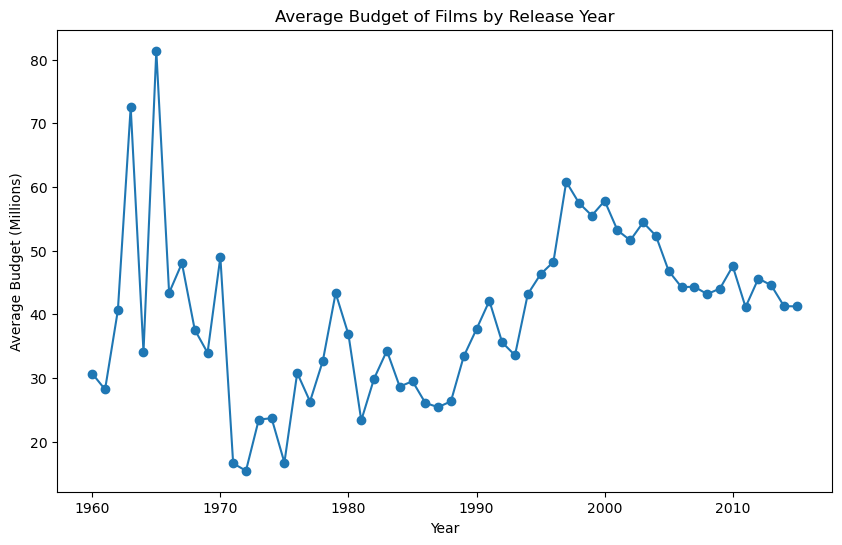

In [44]:
#create a line plot
plt.figure(figsize=(10, 6)) 
plt.plot(avg_budget_yr.index, avg_budget_yr.values, marker='o', linestyle='-')

#labels and title
plt.xlabel('Year')
plt.ylabel('Average Budget (Millions)')
plt.title('Average Budget of Films by Release Year');

The line graph show that average budgets used to be higher in the 60s, lower in the 70s, then averaged out to where it is today.

<a id='conclusions'></a>
## Conclusions

The data used in this analysis comes with several limitations. Firstly, a significant portion of the records had to be removed due to missing budget and revenue fields. Additionally, the dataset only spans from 1960 to 2015, which means that certain trends and preferences in the film industry over the past 8 years are not accounted for.

Considering these limitations, the analysis reveals interesting insights into the profitability of different genres. For instance, genres like Romance exhibit fluctuating profitability, with highs and lows occurring within short periods. On the other hand, genres like Action and Adventure have consistently shown a steady rise to the top in terms of profitability. Meanwhile, genres such as Documentaries have historically been less profitable.

Furthermore, when examining the average adjusted budget for movies, it is evident that there were significant spikes during the 1960s, followed by a dip in the 1970s. However, since then, the budget has generally averaged out between these two extremes.

Overall, while the analysis provides valuable insights into the film industry, it is crucial to acknowledge the data's limitations to interpret the findings accurately and make informed conclusions.